In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import statsmodels.formula.api as sm

Import libraries

In [57]:
df=pd.read_csv("delivery_time.csv")

dataset load

In [58]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [116]:
#Rename columns 
df_new=df.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)
df_new

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Text(0.5, 1.0, 'Scatter plot of delivery time')

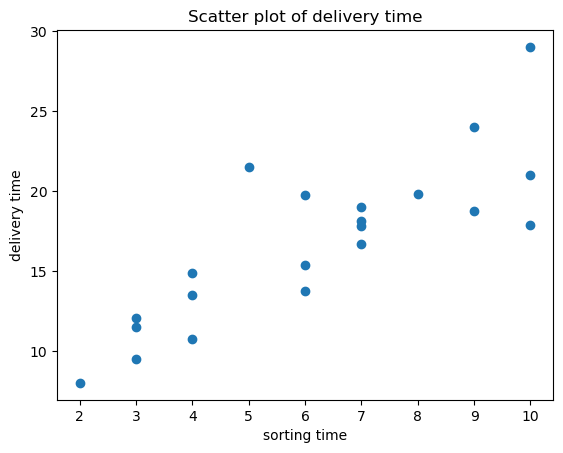

In [117]:
#plot scatter plot of feature and target
plt.scatter(df_new["sorting_time"],df_new["delivery_time"])
plt.xlabel("sorting time")
plt.ylabel("delivery time")
plt.title("Scatter plot of delivery time")

1.scatter plot is to measure a correlationship between target and feature 

2.scatter plot is define that the relationship between target and feature is close to linear

In [61]:
df_new.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


correlation between delivery time and sorting time is 82.5% 

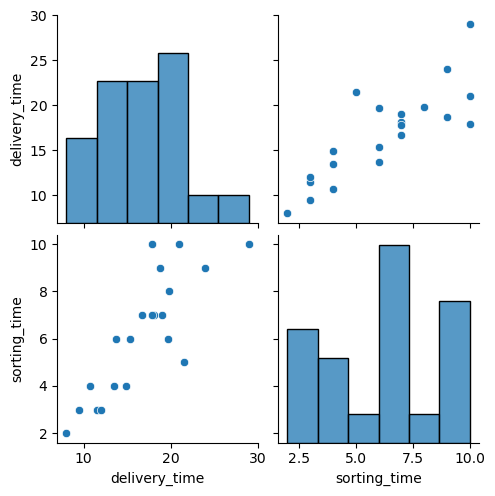

In [62]:
sn.pairplot(df_new)

Pair plot is represent to visualize a correlation between target and feature

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

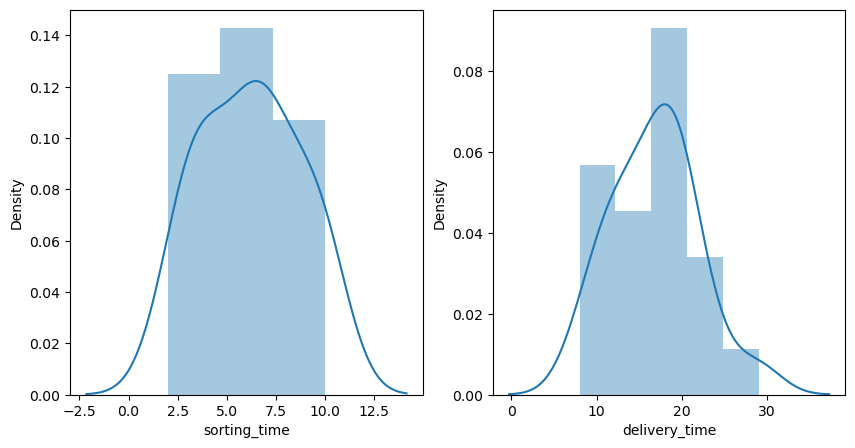

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sn.distplot(df_new["sorting_time"])
plt.subplot(1,2,2)
sn.distplot(df_new["delivery_time"])


feature and target is close to normally distributed

{'whiskers': [<matplotlib.lines.Line2D at 0x18914624430>,
 'caps': [<matplotlib.lines.Line2D at 0x189146248b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18914624160>],
 'medians': [<matplotlib.lines.Line2D at 0x18914624e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x18914633160>],
 'means': []}

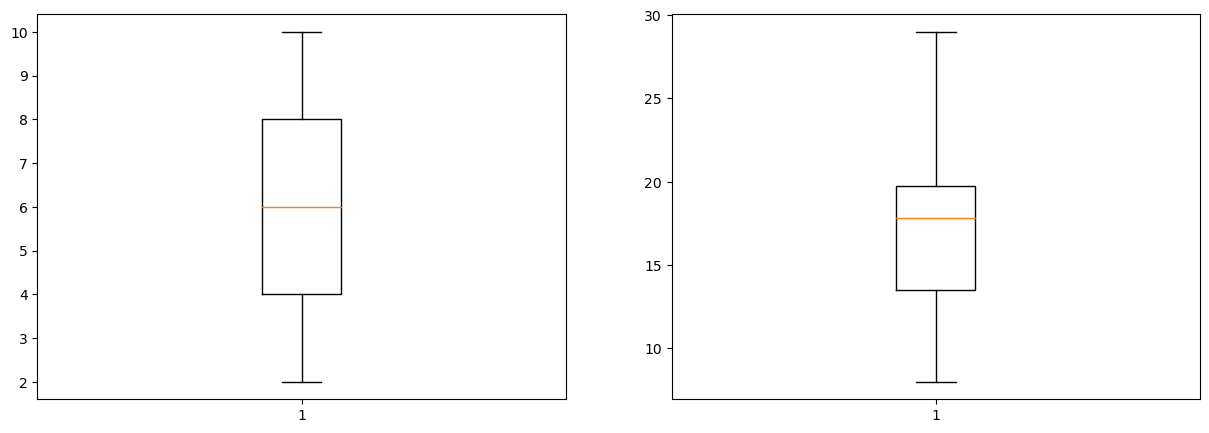

In [112]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df_new["sorting_time"])
plt.subplot(1,2,2)
plt.boxplot(df_new["delivery_time"])

1.boxplot represent outliers

2.There is no outlier present in dataset

In [118]:
##OLS (ordinary least square)method call
model=sm.ols("delivery_time~sorting_time",data=df_new).fit()

In [119]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        12:06:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.where pvalue<0.05 then the model is accpeted

2.summary gets insights from datasets

In [66]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [67]:
model.info_criteria

<bound method RegressionResults.info_criteria of <statsmodels.regression.linear_model.OLSResults object at 0x0000018912B79A30>>

In [68]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [69]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model performance is 68% so model performance is good

In [70]:
delivery_time1=(6.582734)+(1.649)*(4)
delivery_time1

13.178734

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

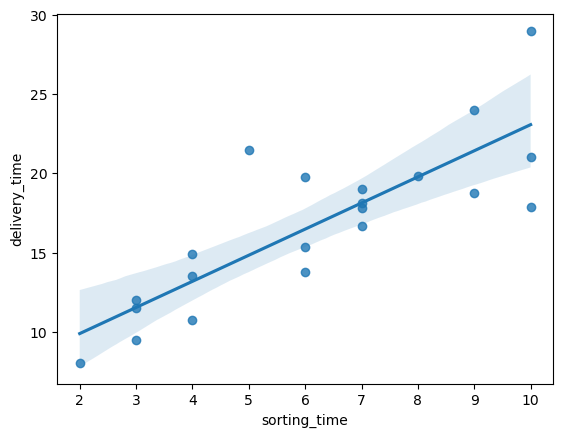

In [71]:
sn.regplot(x=df_new['sorting_time'],y=df_new['delivery_time'])

Text(0, 0.5, 'delivery time')

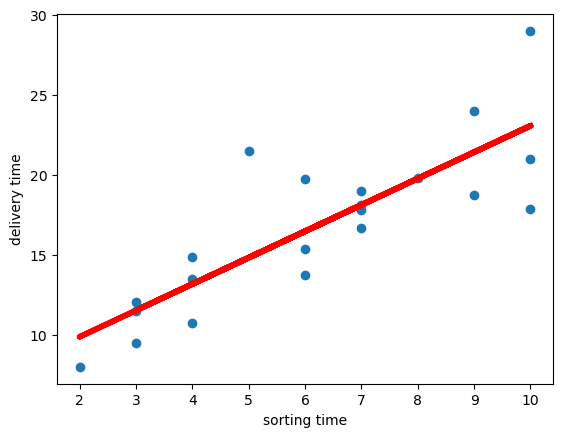

In [72]:
##best fit line
plt.scatter(x=df_new['sorting_time'],y=df_new['delivery_time'])
y_pred=(6.582734)+(1.649)*(df_new["sorting_time"])
fig=plt.plot(df_new["sorting_time"],y_pred,lw=4, c='red', label ='regression line')
plt.xlabel("sorting time")
plt.ylabel("delivery time")

In [73]:
data_new=pd.Series([10,12])
data_new

0    10
1    12
dtype: int64

In [74]:
data_pred=pd.DataFrame(data=data_new,columns=["sortingtime"])
data_pred

,sortingtime
0,10
1,12


In [75]:
y_pred1=(6.582734)+(1.649)*(data_pred)
y_pred1

,sortingtime
0,23.072734
1,26.370734


In [76]:
print("MAE",mean_absolute_error(df_new["delivery_time"],y_pred))

MAE 2.085723904761905


mean absolute error is represent the difference between actual value and predicted value

In [120]:
print("MSE",mean_squared_error(df_new["delivery_time"],y_pred))

MSE 7.793311566184572


In [78]:
print("r2score",r2_score(df_new["delivery_time"],y_pred))

r2score 0.6822714741241611


model perform good (68.227%)

# Transformation

# 1.Squareroot transformation

In [52]:
df_new_sqr_sort=np.sqrt(df_new["sorting_time"])
df_new_sqr_sort

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: sorting_time, dtype: float64

In [90]:
df_new_sqr=pd.DataFrame((df_new_sqr_sort,df_new["delivery_time"])).T
df_new_sqr

,sorting_time,delivery_time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

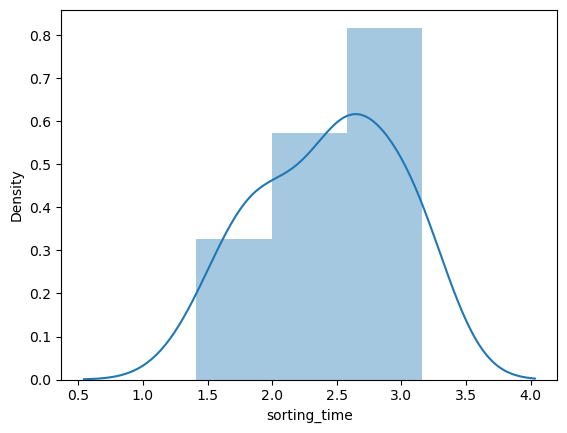

In [114]:
sn.distplot(df_new_sqr["sorting_time"])

In [94]:
model_sqrt=sm.ols(("delivery_time~sorting_time"),data=df_new_sqr).fit()

In [95]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        11:14:28   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5188      2.995     -0.841      0.411      -8.788       3.751
sorting_time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model_sqrt.params

Intercept      -2.518837
sorting_time    7.936591
dtype: float64

In [98]:
y_pred_sqrt=(-2.518837)+(7.936591)*(df_new_sqr["sorting_time"])
y_pred_sqrt

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
Name: sorting_time, dtype: float64

In [100]:
print("r2score",r2_score(df_new_sqr["delivery_time"],y_pred_sqrt))

r2score 0.6958062276308643


In [99]:
print("MAE",mean_absolute_error(df_new_sqr["delivery_time"],y_pred_sqrt))

MAE 2.047327133749685


Model perform approximately same before squareroot transformation and after transformation

Model performance is approximately 69.5% 

# 2.Log Transformation

In [101]:
df_new_log_sort=np.log(df_new["sorting_time"])
df_new_log_sort

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: sorting_time, dtype: float64

In [102]:
df_new_log=pd.DataFrame((df_new_log_sort,df_new["delivery_time"])).T
df_new_log

,sorting_time,delivery_time
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00
5,1.791759,15.35
6,1.945910,19.00
7,1.098612,9.50
8,2.302585,17.90
9,2.197225,18.75


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

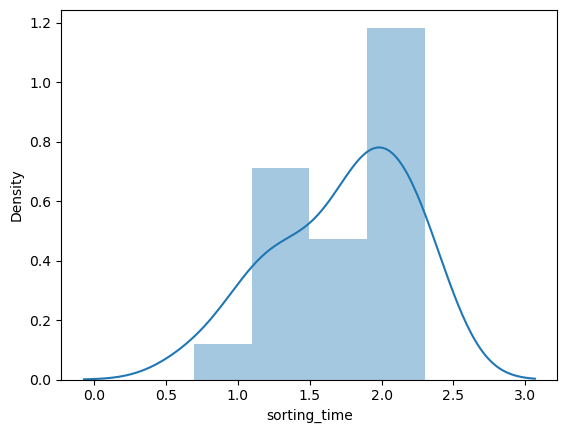

In [115]:
sn.distplot(df_new_log["sorting_time"])

In [103]:
model_log=sm.ols(("delivery_time~sorting_time"),data=df_new_log).fit()

In [104]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        11:21:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1597      2.455      0.472      0.642      -3.978       6.297
sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
model_log.params

Intercept       1.159684
sorting_time    9.043413
dtype: float64

In [106]:
y_pred_log=(1.159684)+(9.043413)*(df_new_log["sorting_time"])
y_pred_log

0     21.982912
1     13.696516
2     17.363305
3     21.030093
4     21.982912
5     17.363305
6     18.757353
7     11.094889
8     21.982912
9     21.030093
10    19.964933
11    13.696516
12    18.757353
13    11.094889
14    11.094889
15    13.696516
16    17.363305
17    18.757353
18     7.428100
19    18.757353
20    15.714496
Name: sorting_time, dtype: float64

In [107]:
print("r2score",r2_score(df_new_log["delivery_time"],y_pred_log))

r2score 0.6954434611324167


In [108]:
print("MAE",mean_absolute_error(df_new_log["delivery_time"],y_pred_log))

MAE 2.0473756009110695


model performance is 69% is same as squareroot transformance

# CONCLUSION

1.Pvalue<0.05 model is accpeted

2.coefficient == 1.64
Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64